In [ ]:
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
from keras.models import Sequential
from tensorflow.keras.layers import Flatten
from keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten, TimeDistributed, Dropout
#define the ticker symbol
tickerSymbol = 'TSLA'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2018-1-1', end='2022-12-31')

#see your data
tickerDf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02 00:00:00-05:00,20.799999,21.474001,20.733334,21.368668,65283000,0.0,0.0
2018-01-03 00:00:00-05:00,21.400000,21.683332,21.036667,21.150000,67822500,0.0,0.0
2018-01-04 00:00:00-05:00,20.858000,21.236668,20.378668,20.974667,149194500,0.0,0.0
2018-01-05 00:00:00-05:00,21.108000,21.149332,20.799999,21.105333,68868000,0.0,0.0
2018-01-08 00:00:00-05:00,21.066668,22.468000,21.033333,22.427334,147891000,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,126.370003,128.619995,121.019997,123.150002,166989700,0.0,0.0
2022-12-27 00:00:00-05:00,117.500000,119.669998,108.760002,109.099998,208643400,0.0,0.0
2022-12-28 00:00:00-05:00,110.349998,116.269997,108.239998,112.709999,221070500,0.0,0.0


In [ ]:

tickerDf.tail(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-12-23 00:00:00-05:00,126.370003,128.619995,121.019997,123.150002,166989700,0.0,0.0
2022-12-27 00:00:00-05:00,117.500000,119.669998,108.760002,109.099998,208643400,0.0,0.0
2022-12-28 00:00:00-05:00,110.349998,116.269997,108.239998,112.709999,221070500,0.0,0.0
2022-12-29 00:00:00-05:00,120.389999,123.570000,117.500000,121.820000,221923300,0.0,0.0
2022-12-30 00:00:00-05:00,119.949997,124.480003,119.750000,123.180000,157777300,0.0,0.0


<Axes: xlabel='Date'>

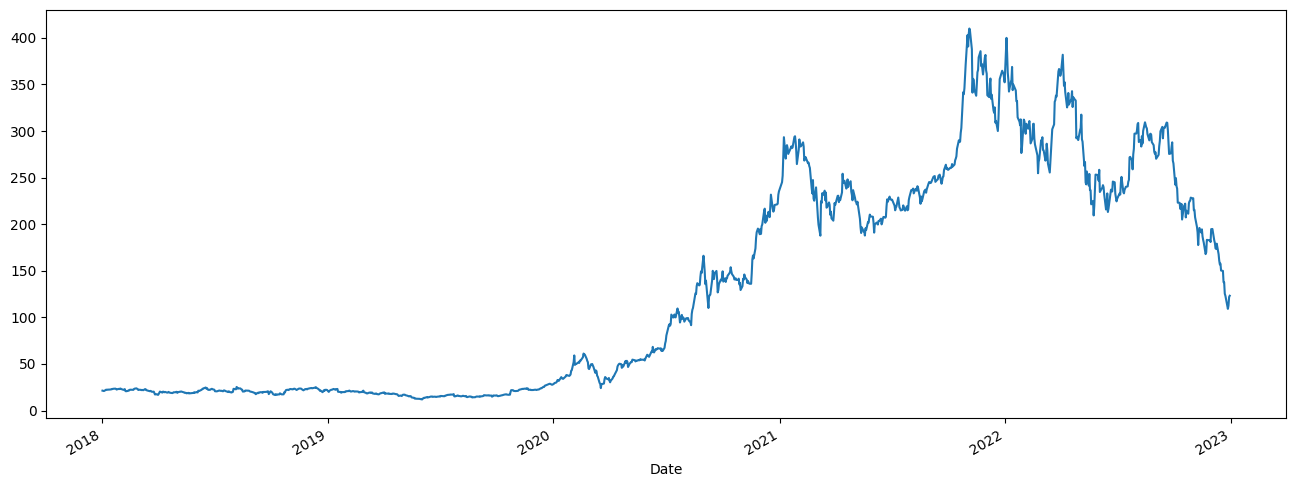

In [ ]:
tickerDf['Close'].plot(figsize=(16,6))

In [ ]:
tickerDf.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-09 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-10 00:00:00-05:00,21.389048,21.866381,21.115524,21.656000,9.584379e+07,0.0,0.0
2018-01-11 00:00:00-05:00,21.610381,22.082571,21.327524,21.821905,1.007580e+08,0.0,0.0
2018-01-12 00:00:00-05:00,21.778286,22.226952,21.500095,22.002572,1.014086e+08,0.0,0.0


<Axes: xlabel='Date'>

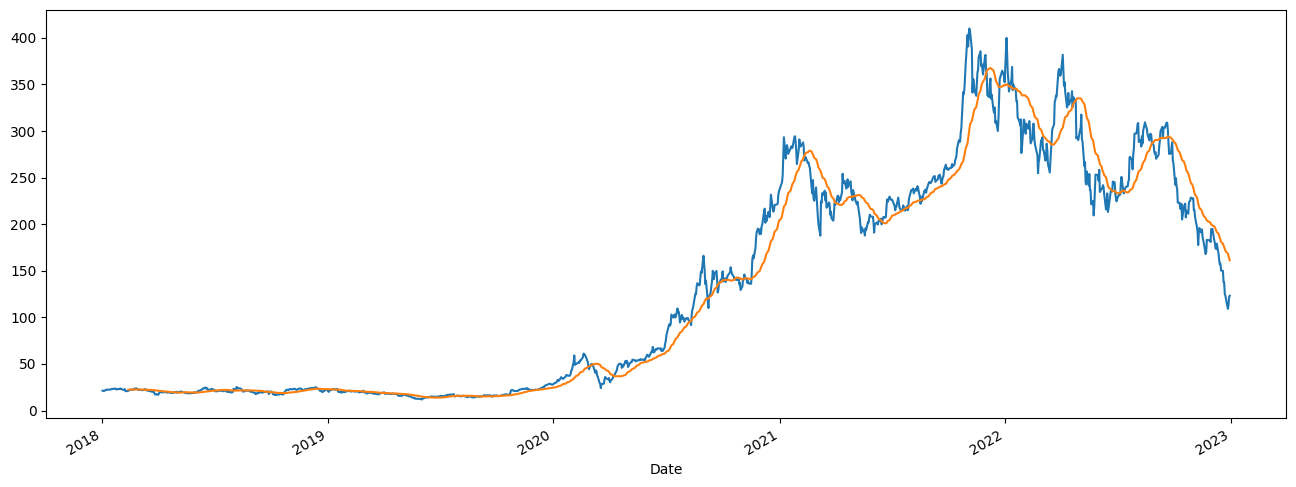

In [ ]:

tickerDf['Close'].plot(figsize=(16,6))
tickerDf.rolling(window=30).mean()['Close'].plot()
     

In [ ]:

df=tickerDf.reset_index()['Close']

df
     

0        21.368668
1        21.150000
2        20.974667
3        21.105333
4        22.427334
           ...    
1254    123.150002
1255    109.099998
1256    112.709999
1257    121.820000
1258    123.180000
Name: Close, Length: 1259, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

print(df)
print(df.shape)
df.ndim

[[0.02370959]
 [0.02316023]
 [0.02271974]
 ...
 [0.25318813]
 [0.27607536]
 [0.27949211]]
(1259, 1)


2

In [ ]:

features_set = []
labels = []
for i in range(60, len(df1)):
    features_set.append(df[i-60:i, 0])
    labels.append(df[i, 0])
    if i<=61:
        print(features_set)
        print(labels)
     

[array([0.02370959, 0.02316023, 0.02271974, 0.02304801, 0.0263693 ,
       0.02591373, 0.02609964, 0.02662723, 0.02633748, 0.02698063,
       0.02816979, 0.027736  , 0.02864881, 0.02890674, 0.02911275,
       0.02795709, 0.02657531, 0.02744792, 0.02856674, 0.02794536,
       0.02936733, 0.02851984, 0.02759866, 0.02581994, 0.02596063,
       0.02780802, 0.0228219 , 0.02201629, 0.02290565, 0.02423383,
       0.02400772, 0.02597738, 0.02621521, 0.02609462, 0.02584841,
       0.02800398, 0.02898881, 0.02988822, 0.02881127, 0.02748309,
       0.02545147, 0.02615324, 0.02585679, 0.02499422, 0.02568092,
       0.02514496, 0.02482171, 0.02789344, 0.02727876, 0.02473127,
       0.02455876, 0.02384693, 0.0225422 , 0.02203806, 0.02303964,
       0.0217952 , 0.020529  , 0.02097117, 0.01678396, 0.01319972])]
[0.014598249993150625]
[array([0.02370959, 0.02316023, 0.02271974, 0.02304801, 0.0263693 ,
       0.02591373, 0.02609964, 0.02662723, 0.02633748, 0.02698063,
       0.02816979, 0.027736  , 0.02

In [ ]:

features_set, labels = np.array(features_set), np.array(labels)

In [ ]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [ ]:
model = Sequential()

# add the CNN layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(60,1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# add the LSTM layers
model.add(TimeDistributed(Flatten()))
model.add(LSTM(64, activation=None, return_sequences=True))
model.add(LSTM(32, activation=None))
model.add(Dense(100, activation=None))
# add the output layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mse', optimizer='adam')

In [ ]:

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 58, 128)           512       
                                                                 
 conv1d_14 (Conv1D)          (None, 56, 64)            24640     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 28, 64)           0         
 1D)                                                             
                                                                 
 time_distributed_4 (TimeDis  (None, 28, 64)           0         
 tributed)                                                       
                                                                 
 lstm_36 (LSTM)              (None, 28, 64)            33024     
                                                                 
 lstm_37 (LSTM)              (None, 32)              

In [ ]:
model.fit(features_set, labels, epochs = 100, batch_size = 16)

Epoch 1/100
75/75 [==============================] - 12s 95ms/step - loss: 0.0236
Epoch 2/100
75/75 [==============================] - 6s 78ms/step - loss: 0.0041
Epoch 3/100
75/75 [==============================] - 6s 79ms/step - loss: 0.0027
Epoch 4/100
75/75 [==============================] - 7s 87ms/step - loss: 0.0022
Epoch 5/100
75/75 [==============================] - 6s 77ms/step - loss: 0.0018
Epoch 6/100
75/75 [==============================] - 4s 52ms/step - loss: 0.0015
Epoch 7/100
75/75 [==============================] - 3s 38ms/step - loss: 0.0015
Epoch 8/100
75/75 [==============================] - 3s 37ms/step - loss: 0.0017
Epoch 9/100
75/75 [==============================] - 3s 38ms/step - loss: 9.9901e-04
Epoch 10/100
75/75 [==============================] - 4s 54ms/step - loss: 0.0011
Epoch 11/100
75/75 [==============================] - 3s 38ms/step - loss: 8.8064e-04
Epoch 12/100
75/75 [==============================] - 3s 37ms/step - loss: 8.0583e-04
Epoch 13/100

# Test Data Set

In [ ]:

tickerSymbol = 'TSLA'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerDf1 = tickerData.history(period='1d', start='2023-01-01', end='2023-04-30')

#see your data
tickerDf1

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03 00:00:00-05:00,118.470001,118.800003,104.639999,108.099998,231402800,0.0,0.0
2023-01-04 00:00:00-05:00,109.110001,114.589996,107.519997,113.639999,180389000,0.0,0.0
2023-01-05 00:00:00-05:00,110.510002,111.750000,107.160004,110.339996,157986300,0.0,0.0
2023-01-06 00:00:00-05:00,103.000000,114.389999,101.809998,113.059998,220911100,0.0,0.0
2023-01-09 00:00:00-05:00,118.959999,123.519997,117.110001,119.769997,190284000,0.0,0.0
...,...,...,...,...,...,...,...
2023-04-24 00:00:00-04:00,164.649994,165.649994,158.610001,162.550003,140006600,0.0,0.0
2023-04-25 00:00:00-04:00,159.820007,163.470001,158.750000,160.669998,121999300,0.0,0.0
2023-04-26 00:00:00-04:00,160.289993,160.669998,153.139999,153.750000,153364100,0.0,0.0


In [ ]:
real_stock_price =tickerDf1.iloc[:, 3:4].values
real_stock_price
     

array([[108.09999847],
       [113.63999939],
       [110.33999634],
       [113.05999756],
       [119.76999664],
       [118.84999847],
       [123.22000122],
       [123.55999756],
       [122.40000153],
       [131.49000549],
       [128.77999878],
       [127.16999817],
       [133.41999817],
       [143.75      ],
       [143.88999939],
       [144.42999268],
       [160.27000427],
       [177.8999939 ],
       [166.66000366],
       [173.22000122],
       [181.41000366],
       [188.27000427],
       [189.97999573],
       [194.75999451],
       [196.80999756],
       [201.28999329],
       [207.32000732],
       [196.88999939],
       [194.63999939],
       [209.25      ],
       [214.24000549],
       [202.03999329],
       [208.30999756],
       [197.36999512],
       [200.86000061],
       [202.07000732],
       [196.88000488],
       [207.63000488],
       [205.71000671],
       [202.77000427],
       [190.8999939 ],
       [197.78999329],
       [193.80999756],
       [187

In [ ]:

test_set=tickerDf1['Close']
test_set=pd.DataFrame(test_set)
test_set.shape

(81, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:


dataset_total = pd.concat((tickerDf['Close'], tickerDf1['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(tickerDf1) - 60:].values
inputs = inputs.reshape(-1,1)

In [ ]:

inputs = scaler.fit_transform(inputs)

In [ ]:

X_test = []
for i in range(60, 141):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price1 = scaler.inverse_transform(predicted_stock_price)

3/3 [==============================] - 0s 15ms/step


In [ ]:

predicted_stock_price1=pd.DataFrame(predicted_stock_price1)
predicted_stock_price1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       81 non-null     float32
dtypes: float32(1)
memory usage: 452.0 bytes


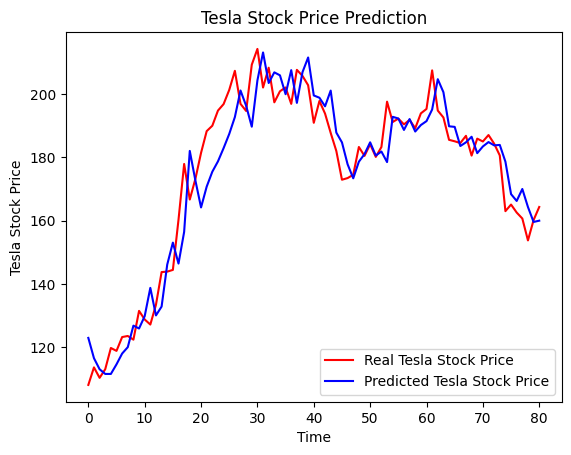

In [ ]:

import matplotlib.pyplot as plt
plt.plot(real_stock_price, color = 'red', label = 'Real Tesla Stock Price')
plt.plot(predicted_stock_price1, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price1))
print("RMSE:", rmse)


RMSE: 8.74012904524435


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(real_stock_price, predicted_stock_price1)
accuracy = 100 - mae
accuracy

93.28327593391325

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(real_stock_price, predicted_stock_price1)
accuracy = r2 * 100
accuracy

90.28193403742448